<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, HDBSCAN, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA


In [ ]:
df = pd.read_csv('SouthGermanCredit.asc', delimiter = ' ')
df = df.drop(columns='kredit',axis = 1)

In [ ]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [ ]:
pca = PCA(n_components = 7,random_state = 42)

In [ ]:
X = df
X = pca.fit_transform(X)

<Axes: >

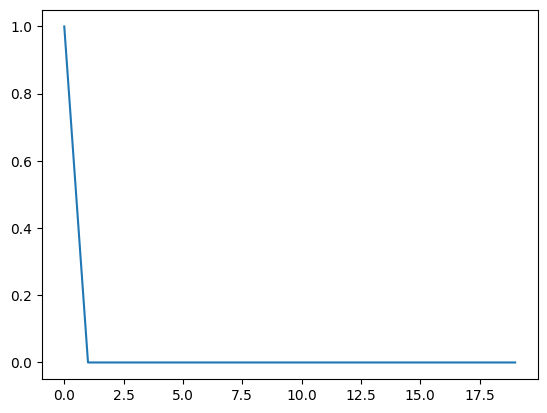

In [ ]:
sns.lineplot(pca.explained_variance_ratio_)

Просто тотально перша фіча забирає 99.99% інформації, можна просто першу фічу лишити

In [ ]:
pca = PCA(n_components = 2,random_state = 42)
X = df
X = pca.fit_transform(X)

<Axes: >

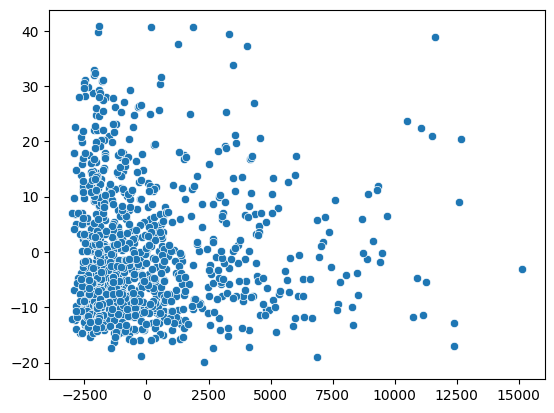

In [ ]:
sns.scatterplot(x = X[:,0],y = X[:,1])

Повинно бути максимум, silhouette_score 0.6311551922710773
Повинно бути мінімум, davies_bouldin_score 0.5426312009925605
Повинно бути максимум, calinski_harabasz_score 2574.449574229933


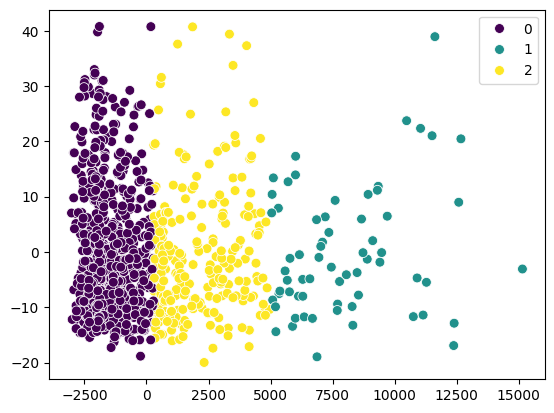

In [ ]:
kmn = KMeans(n_clusters = 3,random_state=42)
X_res = kmn.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=X_res, palette='viridis', s=50)
print("Повинно бути максимум, silhouette_score", silhouette_score(X, X_res))
print("Повинно бути мінімум, davies_bouldin_score",davies_bouldin_score(X, X_res))
print("Повинно бути максимум, calinski_harabasz_score",calinski_harabasz_score(X, X_res))


Повинно бути максимум, silhouette_score 0.6116600984252366
Повинно бути мінімум, davies_bouldin_score 0.6118872248156634
Повинно бути максимум, calinski_harabasz_score 1694.613737735774


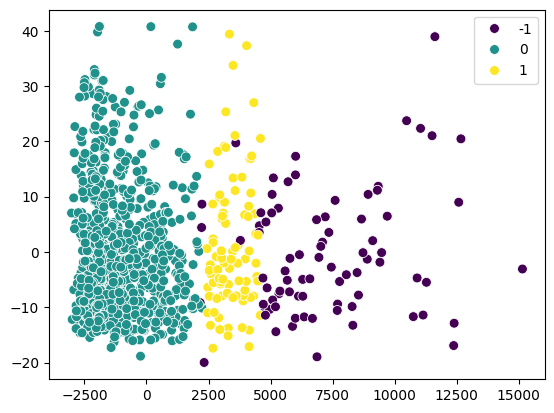

In [ ]:
clustering = HDBSCAN(min_cluster_size = 19)
X_res = clustering.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=X_res, palette='viridis', s=50)
print("Повинно бути максимум, silhouette_score", silhouette_score(X, X_res))
print("Повинно бути мінімум, davies_bouldin_score",davies_bouldin_score(X, X_res))
print("Повинно бути максимум, calinski_harabasz_score",calinski_harabasz_score(X, X_res))

Повинно бути максимум, silhouette_score 0.6637871113862001
Повинно бути мінімум, davies_bouldin_score 0.49879946204555664
Повинно бути максимум, calinski_harabasz_score 2530.474201603742


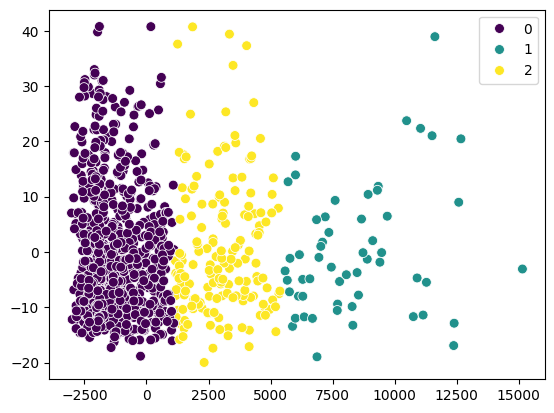

In [ ]:
agc = AgglomerativeClustering(n_clusters=3)
X_res =agc.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=X_res, palette='viridis', s=50)
print("Повинно бути максимум, silhouette_score", silhouette_score(X, X_res))
print("Повинно бути мінімум, davies_bouldin_score",davies_bouldin_score(X, X_res))
print("Повинно бути максимум, calinski_harabasz_score",calinski_harabasz_score(X, X_res))

Повинно бути максимум, silhouette_score 0.4000829372240488
Повинно бути мінімум, davies_bouldin_score 0.7773110655301277
Повинно бути максимум, calinski_harabasz_score 380.99761004946834


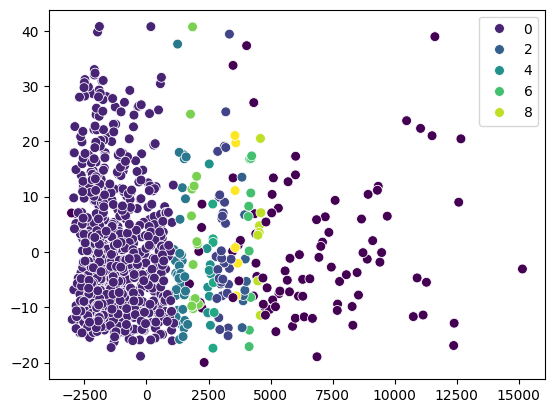

In [ ]:
clustering = DBSCAN(eps = 71, min_samples = 6)
X_res = clustering.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=X_res, palette='viridis', s=50)
print("Повинно бути максимум, silhouette_score", silhouette_score(X, X_res))
print("Повинно бути мінімум, davies_bouldin_score",davies_bouldin_score(X, X_res))
print("Повинно бути максимум, calinski_harabasz_score",calinski_harabasz_score(X, X_res))

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 30):
  #kmeans = KMeans(n_clusters=i, random_state=17, n_init="auto").fit(X)
  hdbscans = HDBSCAN(min_cluster_size=i).fit(X)
  ss = silhouette_score(X, hdbscans.labels_)
  silhouette_scores.append(ss)
  dbs = davies_bouldin_score(X, hdbscans.labels_)
  davies_bouldin_scores.append(dbs)
  chs = calinski_harabasz_score(X, hdbscans.labels_)
  calinski_harabasz_scores.append(chs)
  print(ss, dbs, chs)

0.3517803593775193 4.504421147587982 15.554677301606075
0.28898769289968307 6.334890899164205 51.449871168089146
0.2803070344835769 7.570033681717186 85.30656249508844
0.25824025798489636 2.5756728713901134 78.92737249506904
0.29893300533685646 5.207870945135503 92.65567683344304
0.24331555749609554 4.103390245756307 62.705023683596934
0.2547210496686176 4.581146179323862 65.15936874233184
0.22040742876075428 3.705839573410308 61.242077157653455
0.22904703791858586 5.722956404018862 51.931034743730294
0.20665070572403876 5.670025390856159 80.92187038113798
0.2425440540639463 3.342276592663063 59.25559232103181
0.2009849251336773 2.347006074633081 60.553363108303614
0.18721917660099505 2.3397561961483806 54.22483441213713
0.18879445951685825 2.360855749829477 53.30202178260899
0.1895386064069486 2.3080186246618113 57.31925810639348
0.16034981147077795 2.9551153042686655 53.68263981781266
0.22392257548479358 2.0499863720309226 78.47609510839487
0.6116600966186079 0.611887226710314 1694.6

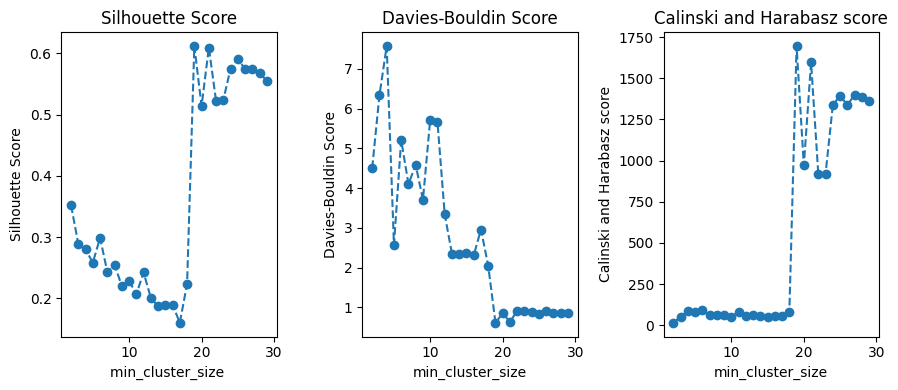

In [ ]:
# Побудова графіків для метрик
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 30), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('min_cluster_size ')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 30), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('min_cluster_size')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 30), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('min_cluster_size')
plt.ylabel('Calinski and Harabasz score')
plt.title('Calinski and Harabasz score')

plt.tight_layout()
plt.show()


Тут прям чітко видно, що гіперпараметр min_cluster_size має бути 19-22 в методі hdbscan

Загалом гіперпараметри перебирав щоб побачити +- хороші метрики, з візуалізацією на t-SNE в мене на минулій домашці робив, там фактично все те саме зробив, тому тут практично Ctrl+c Ctrl+v, бо метрики зразу оцінював при виконанні 9 домашки

In [ ]:
pip install clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.020 seconds.
K=3 fitted in 0.015 seconds.
K=4 fitted in 0.018 seconds.
K=5 fitted in 0.017 seconds.
K=6 fitted in 0.029 seconds.
K=7 fitted in 0.027 seconds.
K=8 fitted in 0.017 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

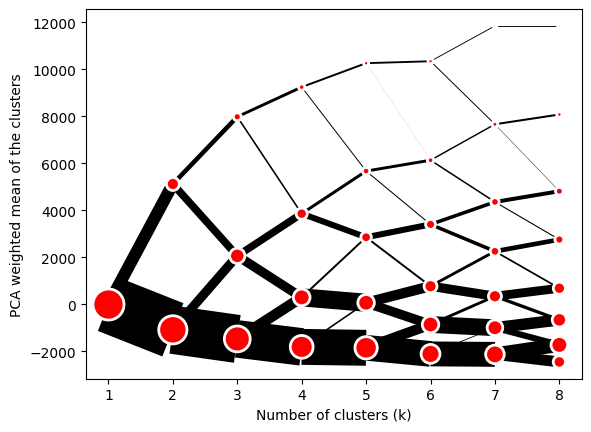

In [ ]:
from clustergram import Clustergram

cgram = Clustergram(range(1, 9))
cgram.fit(X)
cgram.plot()